In [194]:
import jax.numpy as jnp
import jax.random as jrandom


import sys 
import os 
HOME = os.getenv("HOME")
sys.path.append(HOME + "/curr_adventure/exact_sampling/")
sys.path.append(HOME + "/curr_adventure/exact_sampling/Optimization")

from Optimization import BFGS, NewtonMethod, GradientDescent, Trust
from pdfo import newuoa

from NEWUO_test import NEWUOA_Wrapper

from pow_sampling_set import pow_SG
from Functions import PyCutestGetter, HeartDisease, Quadratic
from AdaptiveFD import adapt_FD
from FD import FD

from tqdm import tqdm

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
sig = 0.1
noise_type = "uniform"
F = HeartDisease(sig, noise_type)

In [22]:
num_total_steps = 100
step_size = 1
x_0 = final_X
grad_eps = 1e-11
verbose = True
optimizer = NewtonMethod(x_0, F, step_size, num_total_steps, 0, None, grad_eps, verbose=verbose)
final_X_best, exact_res, exact_X_data = optimizer.run_opt()


In [219]:
print(repr(final_X_best))

DeviceArray([-0.00549042, -0.83499842,  0.90540353, -0.35528798,
             -0.28677555,  0.06359361,  0.23585258,  0.59582554,
             -0.49040073, -0.70567094,  0.33217319, -0.85092055,
             -0.22942091], dtype=float64)


100%|████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.07it/s]


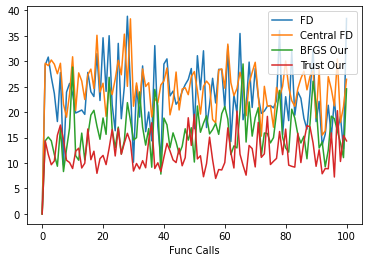

CFG 24.685869449467262
FG 23.065770434567437
Our 16.160715938781994


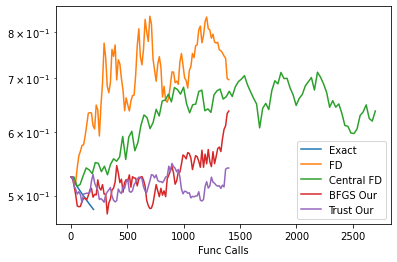

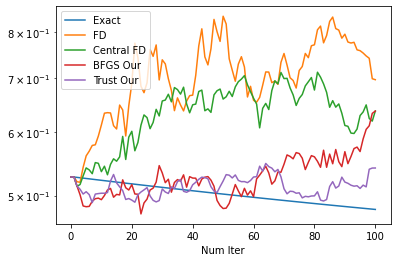

In [265]:
sig = 5
noise_type="uniform"
F = HeartDisease(sig, noise_type)
x_0 = final_X_best + jrandom.normal(jrandom_key, shape=(13,)) * 0.5

jrandom_key = jrandom.PRNGKey(seed)

# dim = 32
# Q = jnp.diag(jnp.logspace(-2, 4, dim))
# b = jnp.zeros(dim)
# F = Quadratic(Q, b, sig=sig, noise_type="uniform")
# x_0 = jnp.ones(dim)/2

step_size = 1e-2
num_total_steps = 100
grad_eps = 1e-10
seed = 10

jrandom_key = jrandom.PRNGKey(seed)


verbose = False

# GD_sig = 0
optimizer = GradientDescent(x_0, F, step_size, num_total_steps, GD_sig, None, grad_eps, verbose=verbose)
final_X, exact_res, exact_X_data = optimizer.run_opt()

# # standard FD
grad_getter = FD(sig, is_central=False, h=1) 
optimizer = BFGS(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
final_X, FD_res, FD_X_data = optimizer.run_opt()

# Central FD
grad_getter = FD(sig, is_central=True, h=0.5) 
optimizer = BFGS(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
final_X, central_FD_res, CFG_X_data = optimizer.run_opt()


# # Our Method
grad_getter = pow_SG(sig, max_h=2)
optimizer = BFGS(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
final_X, our_res, our_X_data = optimizer.run_opt()

# # Our Trust Method
grad_getter = pow_SG(sig, max_h=2)
optimizer = Trust(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
final_X, our_trust_res, our_X_trust_data = optimizer.run_opt()


# plt.plot(range(len(exact_res[:, 2])), exact_res[:, -1], label="Exact")
# plt.plot(adaptFD_res[:, 2], adaptFD_res[:, -1], label="Adapt")
plt.plot(range(len(FD_res[:, 2])), FD_res[:, -1], label="FD")
plt.plot(range(len(central_FD_res[:, 2])), central_FD_res[:, -1], label="Central FD")
plt.plot(range(len(our_res[:, 2])), our_res[:, -1], label="BFGS Our")
plt.plot(range(len(our_trust_res[:, 2])), our_trust_res[:, -1], label="Trust Our")
# # plt.plot(newuoa_res, label="NEWUOA")
plt.xlabel("Func Calls")
# plt.yscale("log")
plt.legend()
plt.show()
print("CFG", jnp.mean(central_FD_res[:, -1]))
print("FG", jnp.mean(FD_res[:, -1]))
print("Our", jnp.mean(our_res[:, -1]))

plt.plot(exact_res[:, 2], exact_res[:, 0], label="Exact")
# plt.plot(adaptFD_res[:, 2], adaptFD_res[:, 0], label="Adapt")
plt.plot(FD_res[:, 2], FD_res[:, 0], label="FD")
plt.plot(central_FD_res[:, 2], central_FD_res[:, 0], label="Central FD")
plt.plot(our_res[:, 2], our_res[:, 0], label="BFGS Our")
plt.plot(our_trust_res[:, 2], our_trust_res[:, 0], label="Trust Our")
# plt.plot(newuoa_res, label="NEWUOA")
plt.xlabel("Func Calls")
plt.yscale("log")
plt.legend()
plt.show()

plt.plot(range(len(exact_res[:, 2])), exact_res[:, 0], label="Exact")
# plt.plot(range(len(adaptFD_res[:, 2])), adaptFD_res[:, 0], label="Adapt")
plt.plot(range(len(FD_res[:, 2])), FD_res[:, 0], label="FD")
plt.plot(range(len(central_FD_res[:, 2])), central_FD_res[:, 0], label="Central FD")
plt.plot(range(len(our_res[:, 2])), our_res[:, 0], label="BFGS Our")
plt.plot(range(len(our_trust_res[:, 2])), our_trust_res[:, 0], label="Trust Our")
# # plt.plot(newuoa_res, label="NEWUOA")
plt.xlabel("Num Iter")
plt.yscale("log")
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.58it/s]


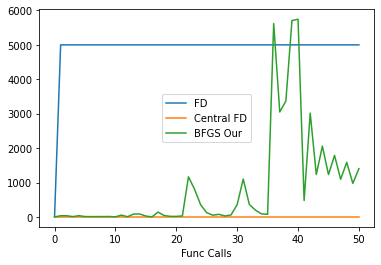

CFG 7.582821816907983e-13
FG 4902.205900736825
Our 859.5069683331602


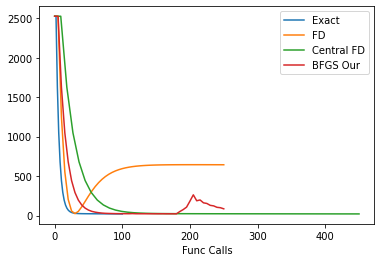

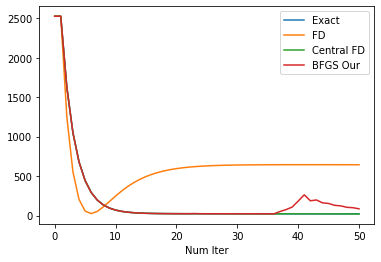

In [238]:
# sig = 0
# noise_type="uniform"
# F = HeartDisease(sig, noise_type)
# x_0 = final_X_best + jrandom.normal(jrandom_key, shape=(13,)) * 2

jrandom_key = jrandom.PRNGKey(seed)

sig = 0

dim = 4
Q = jnp.diag(jnp.logspace(-2, 4, dim))
b = jnp.zeros(dim)
F = Quadratic(Q, b, sig=sig, noise_type="uniform")
x_0 = jnp.ones(dim)/2

step_size = 1e-5
num_total_steps = 50
grad_eps = 1e-10
seed = 12

jrandom_key = jrandom.PRNGKey(seed)


verbose = False

# GD_sig = 0
optimizer = GradientDescent(x_0, F, step_size, num_total_steps, GD_sig, None, grad_eps, verbose=verbose)
final_X, exact_res, exact_X_data = optimizer.run_opt()

# # standard FD
grad_getter = FD(sig, is_central=False, h=0.5) 
optimizer = BFGS(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
final_X, FD_res, FD_X_data = optimizer.run_opt()

# Central FD
grad_getter = FD(sig, is_central=True, h=1) 
optimizer = BFGS(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
final_X, central_FD_res, CFG_X_data = optimizer.run_opt()


# # Our Method
grad_getter = pow_SG(sig, max_h=1)
optimizer = BFGS(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
final_X, our_res, our_X_data = optimizer.run_opt()

# # # Our Trust Method
# grad_getter = pow_SG(sig, max_h=1)
# optimizer = Trust(x_0, F, step_size, num_total_steps, sig, jrandom_key, grad_getter, grad_eps, verbose=verbose)
# final_X, our_trust_res, our_X_trust_data = optimizer.run_opt()


# plt.plot(range(len(exact_res[:, 2])), exact_res[:, -1], label="Exact")
# plt.plot(adaptFD_res[:, 2], adaptFD_res[:, -1], label="Adapt")
plt.plot(range(len(FD_res[:, 2])), FD_res[:, -1], label="FD")
plt.plot(range(len(central_FD_res[:, 2])), central_FD_res[:, -1], label="Central FD")
plt.plot(range(len(our_res[:, 2])), our_res[:, -1], label="BFGS Our")
# plt.plot(range(len(our_trust_res[:, 2])), our_trust_res[:, -1], label="Trust Our")
# # plt.plot(newuoa_res, label="NEWUOA")
plt.xlabel("Func Calls")
# plt.yscale("log")
plt.legend()
plt.show()
print("CFG", jnp.mean(central_FD_res[:, -1]))
print("FG", jnp.mean(FD_res[:, -1]))
print("Our", jnp.mean(our_res[:, -1]))

plt.plot(exact_res[:, 2], exact_res[:, 0], label="Exact")
# plt.plot(adaptFD_res[:, 2], adaptFD_res[:, 0], label="Adapt")
plt.plot(FD_res[:, 2], FD_res[:, 0], label="FD")
plt.plot(central_FD_res[:, 2], central_FD_res[:, 0], label="Central FD")
plt.plot(our_res[:, 2], our_res[:, 0], label="BFGS Our")
# plt.plot(our_trust_res[:, 2], our_trust_res[:, 0], label="Trust Our")
# plt.plot(newuoa_res, label="NEWUOA")
plt.xlabel("Func Calls")
# plt.yscale("log")
plt.legend()
plt.show()

plt.plot(range(len(exact_res[:, 2])), exact_res[:, 0], label="Exact")
# plt.plot(range(len(adaptFD_res[:, 2])), adaptFD_res[:, 0], label="Adapt")
plt.plot(range(len(FD_res[:, 2])), FD_res[:, 0], label="FD")
plt.plot(range(len(central_FD_res[:, 2])), central_FD_res[:, 0], label="Central FD")
plt.plot(range(len(our_res[:, 2])), our_res[:, 0], label="BFGS Our")
# plt.plot(range(len(our_trust_res[:, 2])), our_trust_res[:, 0], label="Trust Our")
# # plt.plot(newuoa_res, label="NEWUOA")
plt.xlabel("Num Iter")
# plt.yscale("log")
plt.legend()
plt.show()

In [188]:
our_res[-1]

DeviceArray([           nan,    47.56066084, 13200.        ,
                        nan], dtype=float64)

In [ ]:
from tqdm import tqdm 

100%|█████████████████████████████████████████████████████████████████████| 201/201 [00:31<00:00,  6.34it/s]


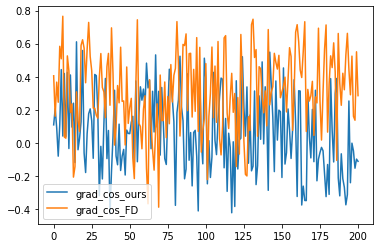

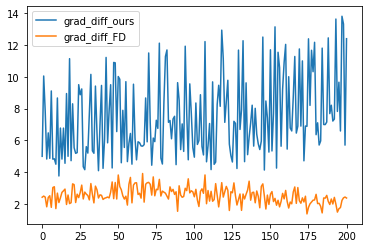

In [137]:
our_grad_getter = pow_SG(sig, max_h=0.5)
FD_grad_getter = FD(sig, is_central=True, h=.5) 

jrandom_key = jrandom.PRNGKey(1)

res_our = []
res_FD = []

x_FD_our_dist = []
x_exact_our_dist = []
x_exact_FD_dist = []

dist_best_our = []
dist_best_FD = []

grad_diff_ours = []
grad_diff_FD = []

grad_cos_ours = []
grad_cos_FD = []


for i in tqdm(range(len(our_X_data))):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    
    curr_FD_X = FD_X_data[i]
    curr_our_X = our_X_data[i]
    
#     res_our.append(F.f(our_X_data[i]))
#     res_FD.append(F.f(FD_X_data[i]))
    
#     x_FD_our_dist.append(jnp.linalg.norm(curr_FD_X - curr_our_X))
#     x_exact_our_dist.append(jnp.linalg.norm(curr_our_X - exact_X_data[i]))
#     x_exact_FD_dist.append(jnp.linalg.norm(curr_FD_X - exact_X_data[i]))
    
#     dist_best_our.append(jnp.linalg.norm(exact_X_data[-1] - curr_our_X))
#     dist_best_FD.append(jnp.linalg.norm(exact_X_data[-1] - curr_FD_X)) 

    grad_exact_ours = F.f1(curr_our_X)
    grad_exact_FD = F.f1(curr_FD_X)
    
    grad_ours = our_grad_getter.grad(F, curr_our_X, subkey, H=F.f2(curr_our_X))[0]
    grad_FD = FD_grad_getter.grad(F, curr_FD_X, subkey, H=F.f2(curr_FD_X))[0]
    
    grad_diff_ours.append(jnp.linalg.norm(grad_exact_ours - grad_ours)/jnp.linalg.norm(grad_exact_ours))
    grad_diff_FD.append(jnp.linalg.norm(grad_exact_FD - grad_FD)/jnp.linalg.norm(grad_exact_FD))

    grad_cos_ours.append(float(grad_ours @ grad_exact_ours) / (jnp.linalg.norm(grad_exact_ours) * jnp.linalg.norm(grad_ours)))
    grad_cos_FD.append(float(grad_FD @ grad_exact_FD) / (jnp.linalg.norm(grad_exact_FD) * jnp.linalg.norm(grad_FD)))
    
    
#     if grad_cos_FD[-1] < 0:
#         print(subkey)
#         print(i)




# plt.plot(x_FD_our_dist, label="FD our")
# plt.plot(x_exact_our_dist, label="exact our")
# plt.plot(x_exact_FD_dist, label="exact FD")

# plt.plot(dist_best_our, label="Dist best our")
# plt.plot(dist_best_FD, label="Dist best FD")

plt.plot(grad_cos_ours, label="grad_cos_ours")
plt.plot(grad_cos_FD, label="grad_cos_FD")

plt.legend()
plt.show()

plt.plot(grad_diff_ours, label="grad_diff_ours")
plt.plot(grad_diff_FD, label="grad_diff_FD")

plt.legend()
plt.show()
    
# plt.plot(res_our)
# plt.plot(res_FD)



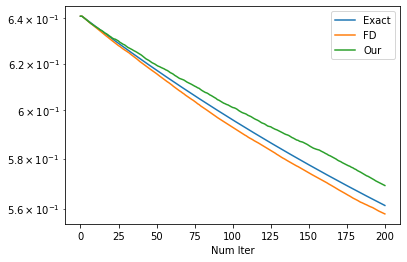

In [149]:
plt.plot(range(len(exact_res[:, 2])), exact_res[:, 0], label="Exact")
# plt.plot(range(len(adaptFD_res[:, 2])), adaptFD_res[:, 0], label="Adapt")
plt.plot(range(len(FD_res[:, 2])), FD_res[:, 0], label="FD")
# plt.plot(range(len(central_FD_res[:, 2])), central_FD_res[:, 0], label="Central FD")
plt.plot(range(len(our_res[:, 2])), our_res[:, 0], label="Our")
# # plt.plot(newuoa_res, label="NEWUOA")
plt.xlabel("Num Iter")
plt.yscale("log")
plt.legend()
plt.show()

In [242]:
dim = 2
Q = jnp.diag(jnp.array([0.1, 1e4])) # jnp.diag(jnp.logspace(-2, 4, dim))
b = jnp.zeros(dim)
sig = 0
F = Quadratic(Q, b, sig=sig, noise_type="uniform")
x_0 = jnp.ones(dim)/2

In [243]:
F.f1(x_0)

DeviceArray([1.e-01, 1.e+04], dtype=float64)

In [245]:
h = 0.1 

I = jnp.eye(dim)

print("grad 1", (F.f(x_0 + h * I[0]) - F.f(x_0)) / h)
print("grad 2", (F.f(x_0 + h * I[1]) - F.f(x_0)) / h)

grad 1 0.10999999999967258
grad 2 11000.0
